Before Getting Started make sure you got pip and python 3.8 or higher

I am using a Jupyter Notebook and I might already have these libraries but going to run it just in case

In [ ]:
pip install pandas numpy matplotlib yfinance seaborn

These are the following companies we are going to use for analyzing:
San Miguel Corporation (SMGBF)
Jollibee Foods Corporation (JBFCY)
Universal Robina Corporation (UVRBF)
Mondelez International, Inc.(MDLZ)

yfinance is a library for fetching historical stock data

pandas for Data Exploration and Data Cleaning

seaborn and matplotlib for Data Visualization (Honestly when I heard about these in 2016 or 17 I thought these were YouTubers)

In [1]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import os #for files read/write
from datetime import datetime # For time stamps
import yfinance as yf #fetching the data stock
from __future__ import division# For division in Python 3

In [4]:
# Fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data
smg_data = fetch_stock_data('SMGBF', '2021-01-01', '2023-12-31')
jbf_data = fetch_stock_data('JBFCY', '2021-01-01', '2023-12-31')
uvr_data = fetch_stock_data('UVRBF', '2021-01-01', '2023-12-31')
delm_data = fetch_stock_data('MDLZ', '2021-01-01', '2023-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


checking data

In [5]:
print(smg_data.head())
print(jbf_data.head())
print(uvr_data.head())
print(delm_data.head())

Price          Close      High       Low      Open Volume
Ticker         SMGBF     SMGBF     SMGBF     SMGBF  SMGBF
Date                                                     
2021-01-04  2.550820  2.550820  2.550820  2.550820      0
2021-01-05  2.479167  2.479167  2.479167  2.479167   1100
2021-01-06  2.479167  2.479167  2.479167  2.479167      0
2021-01-07  2.479167  2.479167  2.479167  2.479167      0
2021-01-08  2.479167  2.479167  2.479167  2.479167      0
Price           Close       High        Low       Open Volume
Ticker          JBFCY      JBFCY      JBFCY      JBFCY  JBFCY
Date                                                         
2021-01-04  15.941961  15.941961  15.941961  15.941961    500
2021-01-05  15.941961  15.941961  15.941961  15.941961      0
2021-01-06  15.941961  15.941961  15.941961  15.941961      0
2021-01-07  14.946193  15.139546  14.946193  14.946193   1100
2021-01-08  14.946193  14.946193  14.946193  14.946193      0
Price          Close      High       Low

checking for dupes

In [ ]:
print(smg_data.isnull().sum())
print(jbf_data.isnull().sum())
print(uvr_data.isnull().sum())
print(delm_data.isnull().sum())

In [ ]:
type(smg_data) #I just like to check what type of data we are working with

checking excel file

In [7]:
path = 'fnbStocks.xlsx'
isExist = os.path.exists(path)
print(isExist)

True


So there was an error making the excel and here you would see that the columns for our data frame has two values 

In [8]:
display(smg_data)

Price,Close,High,Low,Open,Volume
Ticker,SMGBF,SMGBF,SMGBF,SMGBF,SMGBF
Date,,,,,
2021-01-04,2.550820,2.550820,2.550820,2.550820,0
2021-01-05,2.479167,2.479167,2.479167,2.479167,1100
2021-01-06,2.479167,2.479167,2.479167,2.479167,0
2021-01-07,2.479167,2.479167,2.479167,2.479167,0
2021-01-08,2.479167,2.479167,2.479167,2.479167,0
...,...,...,...,...,...
2023-12-22,1.920405,1.920405,1.920405,1.920405,0
2023-12-26,1.920405,1.920405,1.920405,1.920405,0


In [9]:
display(smg_data.columns)

MultiIndex([( 'Close', 'SMGBF'),
            (  'High', 'SMGBF'),
            (   'Low', 'SMGBF'),
            (  'Open', 'SMGBF'),
            ('Volume', 'SMGBF')],
           names=['Price', 'Ticker'])

reassigned every dataframe with a new column

In [10]:
smg_data.columns= [col[0] for col in smg_data.columns]
jbf_data.columns=[col[0] for col in jbf_data.columns]
uvr_data.columns=[col[0] for col in uvr_data.columns]
delm_data.columns=[col[0] for col in delm_data.columns]

In [11]:
display(smg_data.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [12]:
display(smg_data)

,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,2.550820,2.550820,2.550820,2.550820,0
2021-01-05,2.479167,2.479167,2.479167,2.479167,1100
2021-01-06,2.479167,2.479167,2.479167,2.479167,0
2021-01-07,2.479167,2.479167,2.479167,2.479167,0
2021-01-08,2.479167,2.479167,2.479167,2.479167,0
...,...,...,...,...,...
2023-12-22,1.920405,1.920405,1.920405,1.920405,0
2023-12-26,1.920405,1.920405,1.920405,1.920405,0
2023-12-27,1.880809,1.969900,1.880809,1.969900,3000


In [13]:
with pd.ExcelWriter('fnbStocks.xlsx') as writer:
    smg_data.to_excel(writer, sheet_name='SanMiguel')
    jbf_data.to_excel(writer, sheet_name='Jollibee')
    uvr_data.to_excel(writer, sheet_name='Robina')
    delm_data.to_excel(writer, sheet_name='DelMonte')

check to see if your excel file is good.

<Axes: xlabel='Date'>

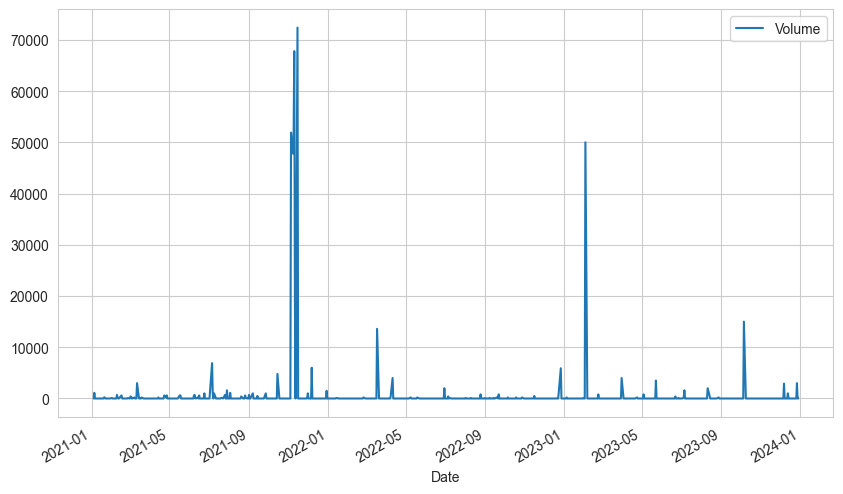

In [14]:
smg_data['Volume'].plot(legend=True,figsize=(10,6))
#historical view of volume for San Miguel Corp

Pivot a table from datetime

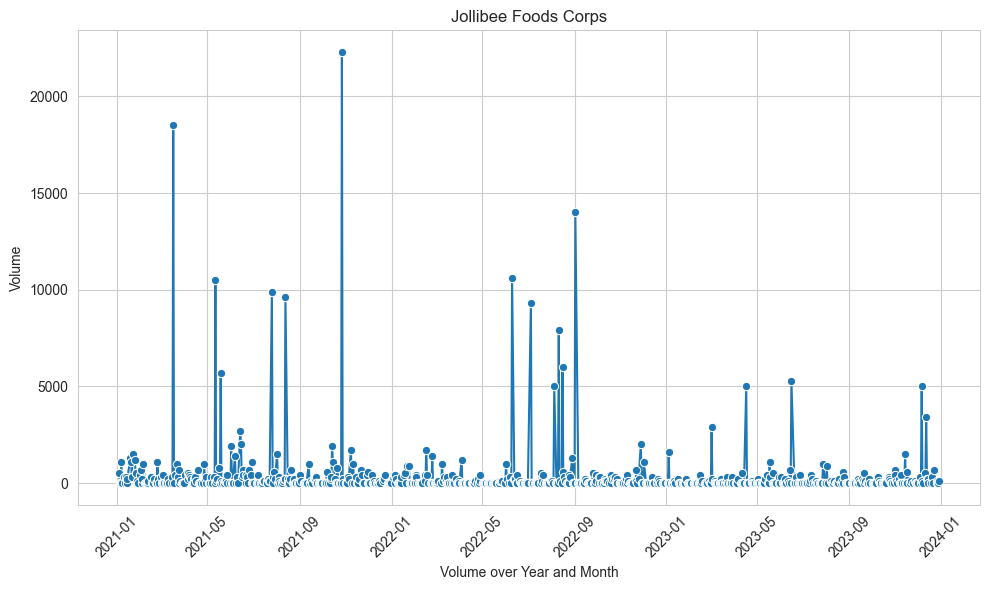

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Volume', data=jbf_data, marker='o')
plt.xticks(rotation=45)
plt.title('Jollibee Foods Corps')
plt.xlabel('Volume over Year and Month')
plt.tight_layout()
plt.show()

historical view of volume for Jollibee

In [16]:
display(uvr_data)

,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,2.765748,2.765748,2.765748,2.765748,0
2021-01-05,2.765748,2.765748,2.765748,2.765748,0
2021-01-06,2.765748,2.765748,2.765748,2.765748,0
2021-01-07,2.765748,2.765748,2.765748,2.765748,0
2021-01-08,2.844769,2.844769,2.844769,2.844769,5000
...,...,...,...,...,...
2023-12-22,1.870327,1.870327,1.870327,1.870327,0
2023-12-26,1.831961,1.831961,1.831961,1.831961,7600
2023-12-27,1.831961,1.831961,1.831961,1.831961,0


In [17]:
# Convert 'date_column' to datetime format
uvr_data = uvr_data.reset_index(drop=False)
display(uvr_data)

,Date,Close,High,Low,Open,Volume
0,2021-01-04,2.765748,2.765748,2.765748,2.765748,0
1,2021-01-05,2.765748,2.765748,2.765748,2.765748,0
2,2021-01-06,2.765748,2.765748,2.765748,2.765748,0
3,2021-01-07,2.765748,2.765748,2.765748,2.765748,0
4,2021-01-08,2.844769,2.844769,2.844769,2.844769,5000
...,...,...,...,...,...,...
748,2023-12-22,1.870327,1.870327,1.870327,1.870327,0
749,2023-12-26,1.831961,1.831961,1.831961,1.831961,7600
750,2023-12-27,1.831961,1.831961,1.831961,1.831961,0
751,2023-12-28,1.831961,1.831961,1.831961,1.831961,0


<Axes: xlabel='Date', ylabel='Close'>

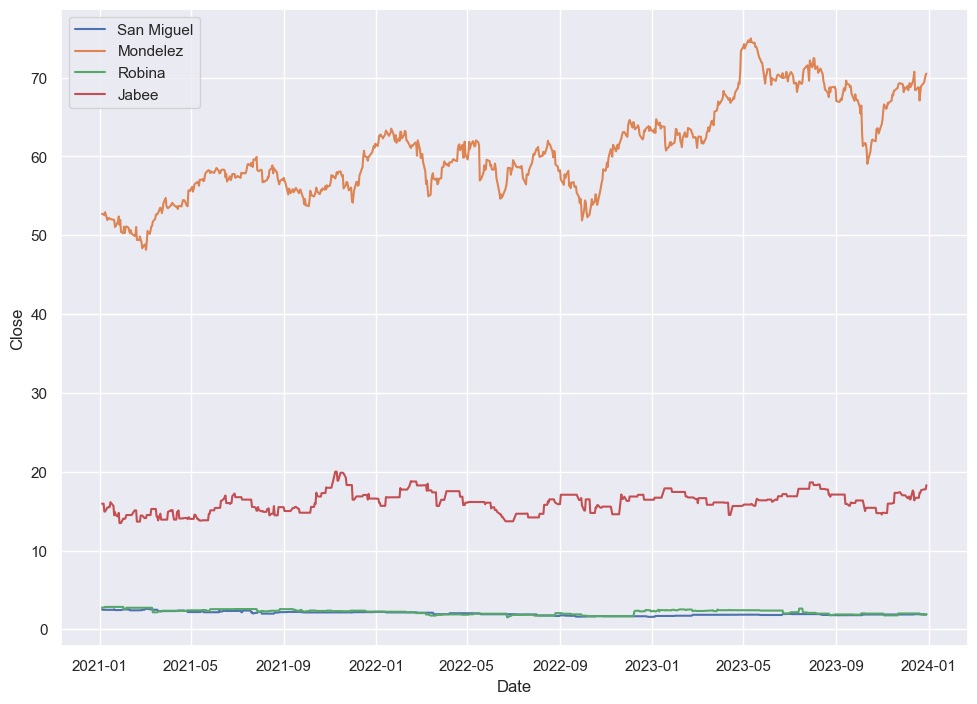

In [18]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=smg_data, x='Date', y='Close', label='San Miguel')
sns.lineplot(data=delm_data, x='Date', y='Close', label='Mondelez')
sns.lineplot(data=uvr_data, x='Date', y='Close', label='Robina')
sns.lineplot(data=jbf_data, x='Date', y='Close', label='Jabee')

historical comparison of Closing price of Stocks 

In [19]:
smg_data = smg_data.reset_index(drop=False)
jbf_data = jbf_data.reset_index(drop=False)
delm_data = delm_data.reset_index(drop=False)

In [20]:
smg_data.insert(0, 'Name', 'San Miguel Corp')
jbf_data.insert(0, 'Name', 'Jollibee Food Corp')
delm_data.insert(0, 'Name', 'Mondelez International')
uvr_data.insert(0, 'Name', 'Universal Robina Corp')
#adding a columns Name in the data frame

In [21]:
# The comp stocks we'll use for this analysis
comp_list = [smg_data,jbf_data,uvr_data,delm_data]
#merging all the companies
comp_listGlobal = pd.concat(comp_list)

In [22]:
display(comp_listGlobal)

,Name,Date,Close,High,Low,Open,Volume
0,San Miguel Corp,2021-01-04,2.550820,2.550820,2.550820,2.550820,0
1,San Miguel Corp,2021-01-05,2.479167,2.479167,2.479167,2.479167,1100
2,San Miguel Corp,2021-01-06,2.479167,2.479167,2.479167,2.479167,0
3,San Miguel Corp,2021-01-07,2.479167,2.479167,2.479167,2.479167,0
4,San Miguel Corp,2021-01-08,2.479167,2.479167,2.479167,2.479167,0
...,...,...,...,...,...,...,...
748,Mondelez International,2023-12-22,68.921280,69.269710,68.476065,68.553496,4109000
749,Mondelez International,2023-12-26,69.405212,69.589108,68.718033,68.911602,4002900
750,Mondelez International,2023-12-27,69.889145,69.937541,69.240681,69.463284,4061500
751,Mondelez International,2023-12-28,70.351608,70.439228,69.796662,69.884282,4095300


<Axes: xlabel='Date', ylabel='Close'>

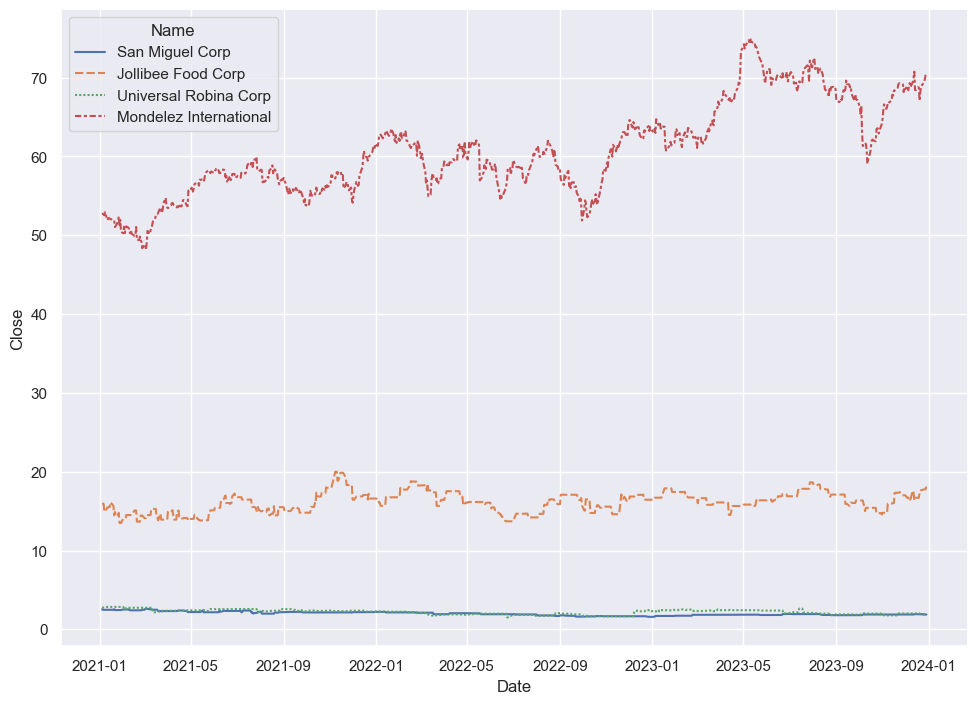

In [23]:
sns.lineplot(data=comp_listGlobal,x="Date", y="Close", hue="Name", style="Name")

This is a much simple code of historical comparison of Closing price of Stocks 

In [25]:
#pivot a new data frame here
CloseDF = comp_listGlobal.pivot(index='Date', columns='Name', values=['Close'])
display(CloseDF)

Close                                         \
Name       Jollibee Food Corp Mondelez International San Miguel Corp   
Date                                                                   
2021-01-04          15.941961              52.686432        2.550820   
2021-01-05          15.941961              52.741009        2.479167   
2021-01-06          15.941961              52.640957        2.479167   
2021-01-07          14.946193              52.540890        2.479167   
2021-01-08          14.946193              52.932041        2.479167   
...                       ...                    ...             ...   
2023-12-22          17.654762              68.921280        1.920405   
2023-12-26          17.764172              69.405212        1.920405   
2023-12-27          17.764172              69.889145        1.880809   
2023-12-28          17.764172              70.351608        1.880809   
2023-12-29          18.291327              70.517113        1.880809   

                                  
Name       Universal Robina Corp  
Date                              
2021-01-04              2.765748  
2021-01-05              2.765748  
2021-01-06              2.765748  
2021-01-07              2.765748  
2021-01-08              2.844769  
...                          ...  
2023-12-22              1.870327  
2023-12-26              1.831961  
2023-12-27              1.831961  
2023-12-28              1.831961  
2023-12-29              1.927875  

[753 rows x 4 columns]

In [26]:
# Calculate the daily return percent of all stocks and store them 
comp_returns = CloseDF.pct_change()

In [27]:
display(comp_returns)

Close                                         \
Name       Jollibee Food Corp Mondelez International San Miguel Corp   
Date                                                                   
2021-01-04                NaN                    NaN             NaN   
2021-01-05           0.000000               0.001036       -0.028090   
2021-01-06           0.000000              -0.001897        0.000000   
2021-01-07          -0.062462              -0.001901        0.000000   
2021-01-08           0.000000               0.007445        0.000000   
...                       ...                    ...             ...   
2023-12-22           0.018944               0.010644        0.000000   
2023-12-26           0.006197               0.007022        0.000000   
2023-12-27           0.000000               0.006973       -0.020619   
2023-12-28           0.000000               0.006617        0.000000   
2023-12-29           0.029675               0.002353        0.000000   

                                  
Name       Universal Robina Corp  
Date                              
2021-01-04                   NaN  
2021-01-05              0.000000  
2021-01-06              0.000000  
2021-01-07              0.000000  
2021-01-08              0.028571  
...                          ...  
2023-12-22              0.000000  
2023-12-26             -0.020513  
2023-12-27              0.000000  
2023-12-28              0.000000  
2023-12-29              0.052356  

[753 rows x 4 columns]

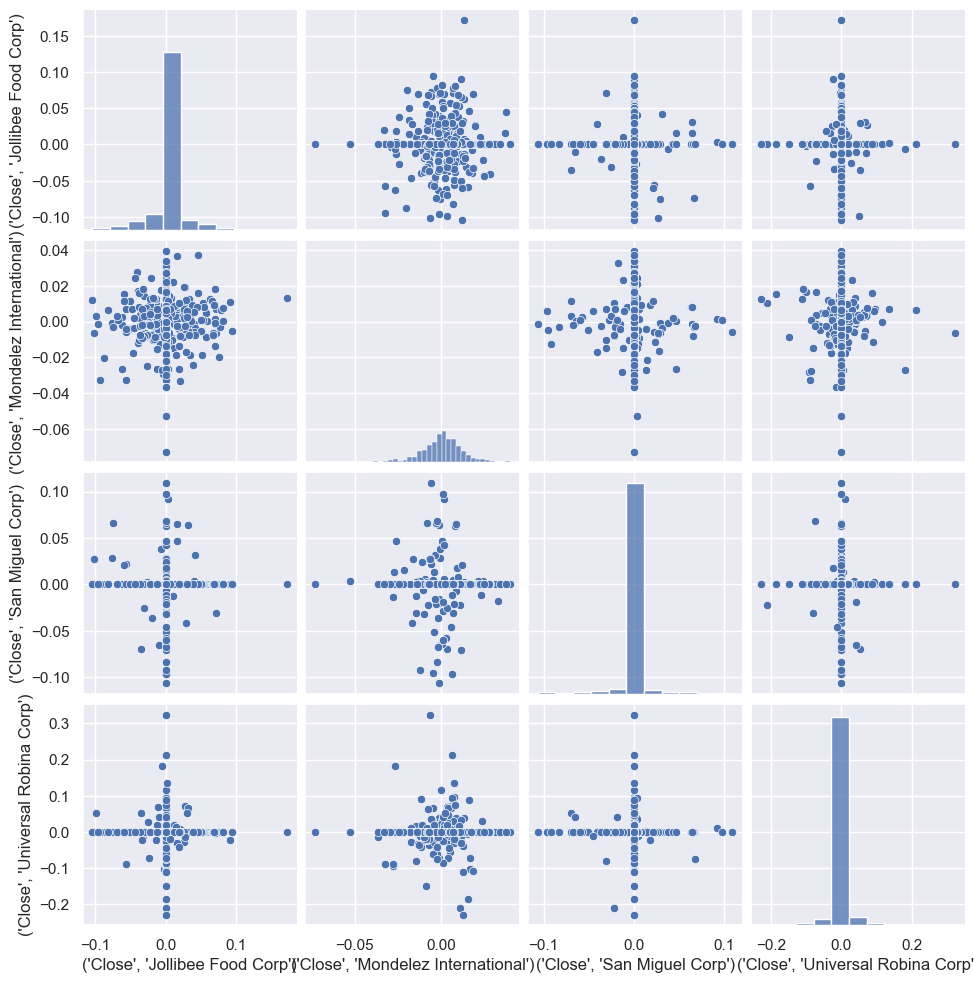

In [33]:
sns.pairplot(comp_returns.dropna())
#correlation analysis for all possible pairs of stocks in our food stock ticker list.

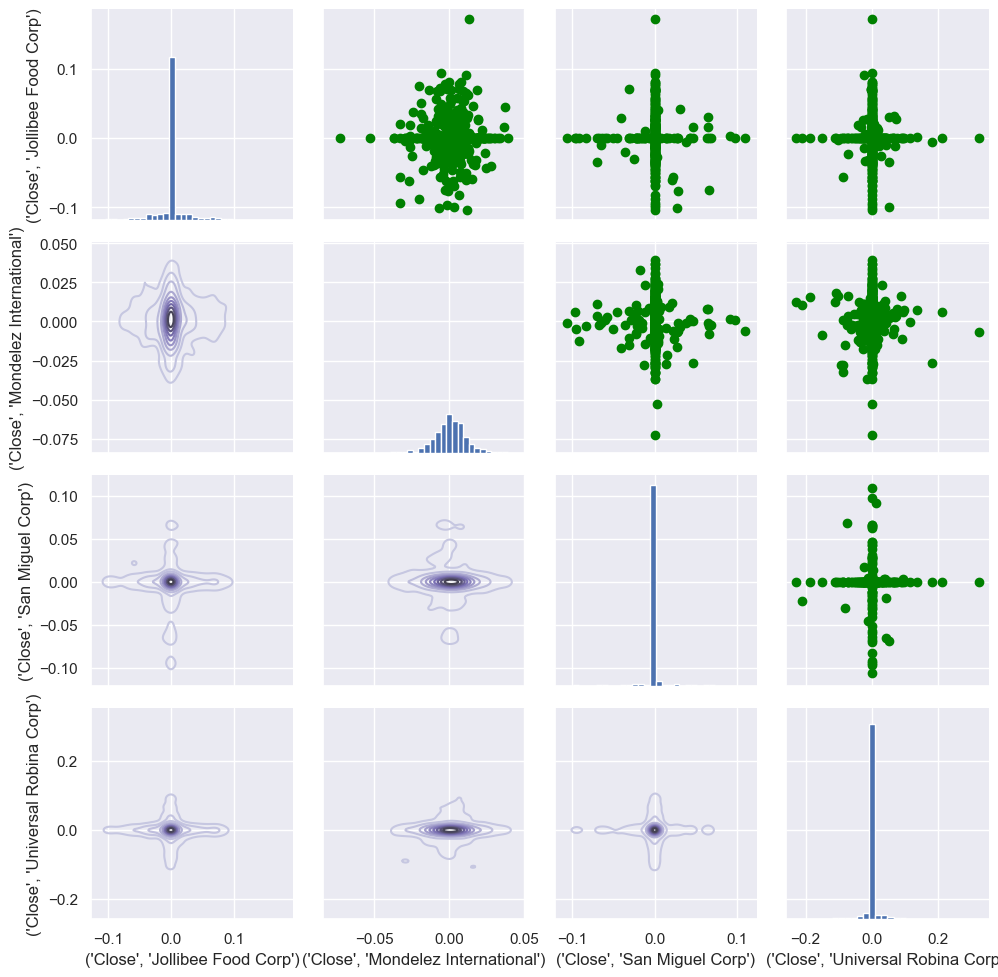

In [34]:
# Mixed plot to visualize the correlation between all food stocks
comp_fig = sns.PairGrid(comp_returns.dropna())
comp_fig.map_upper(plt.scatter,color='green')
comp_fig.map_lower(sns.kdeplot,cmap='Purples_d')
comp_fig.map_diag(plt.hist,bins=30)

<Axes: xlabel='None-Name', ylabel='None-Name'>

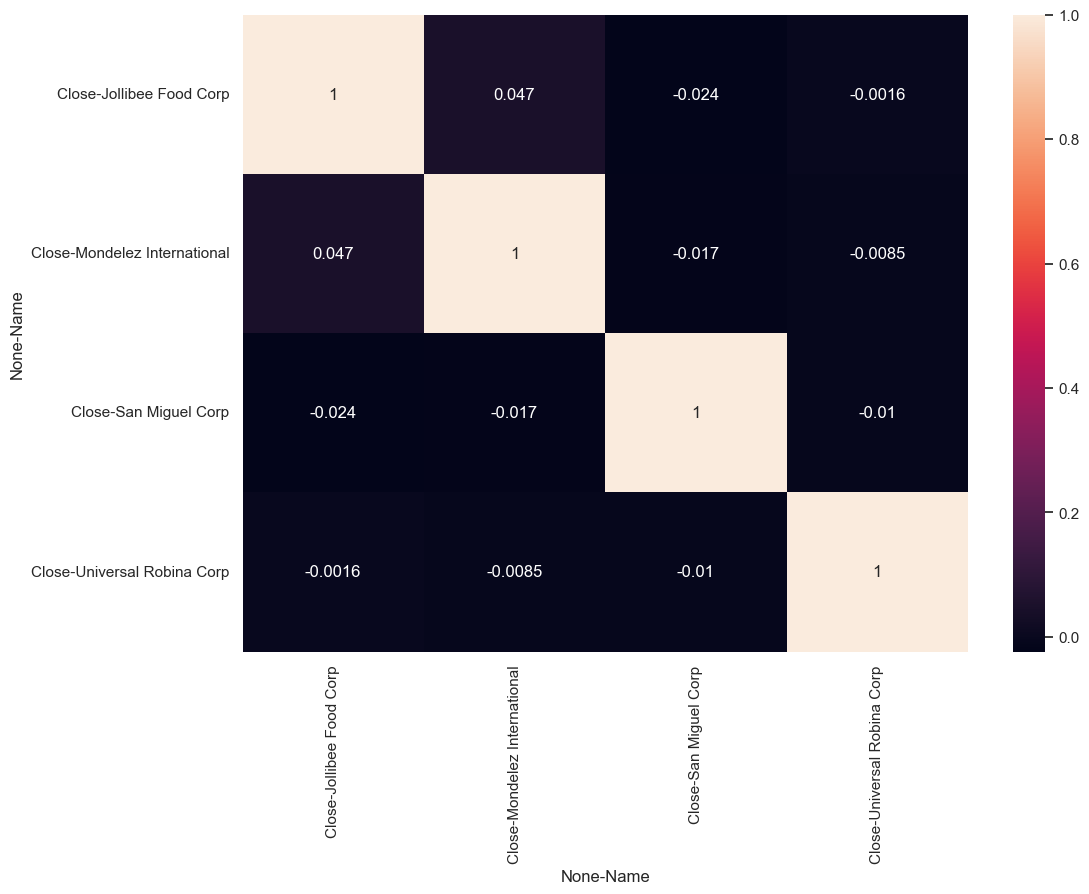

In [36]:
# Correlation plot for the daily returns of all stocks
comp_returns_corr= comp_returns.dropna().corr()
sns.heatmap(comp_returns_corr,annot=True)